In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pandas openpyxl

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/ColabFiles/CategoryDataset1.csv')

# Tokenize the "Categories" column and convert to lowercase
df['categories'] = df['Categories'].apply(lambda x: [cat.strip().strip('"').lower() for cat in x.split(",")])

# Get unique categories and sort them alphabetically
all_categories = sorted(set(category for categories_list in df['categories'] for category in categories_list))

# Create a new dataframe with separate columns for each category
new_columns = {category: df['categories'].apply(lambda x: 1 if category in x else 0) for category in all_categories}
new_df = pd.concat([df, pd.DataFrame(new_columns)], axis=1)

# Drop the original 'categories' column if needed
new_df = new_df.drop(columns=['Categories', 'categories'])

# Shuffle the rows using pandas sample method
shuffled_df = new_df.sample(frac=1, random_state=42)  # frac=1 means the entire DataFrame will be sampled

# Save the result DataFrame to a new CSV file with UTF-8 encoding
shuffled_df.to_csv('/content/drive/MyDrive/ColabFiles/CategoryDataset2.csv', index=False, encoding='utf-8')

# Display the result
print(shuffled_df)

                                              Sentence  .net  address  \
73                          "456 Oak St, Hilltop, USA"     0        1   
414                                            "NumPy"     0        0   
394                                       "Express.js"     0        0   
277  "IT consultant with an MBA and a focus on prov...     0        0   
399                                             "Dart"     0        0   
..                                                 ...   ...      ...   
106                                "Dinesh Ranasinghe"     0        0   
270  "IT project manager with an MBA and a speciali...     0        0   
348  "Bachelor of Technology in Cloud Computing wit...     0        0   
435                                            "MySQL"     0        0   
102                                    "Malini Perera"     0        0   

     adobe creative suite  agile methodologies  ai  algorithms  android  \
73                      0                    0  

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ColabFiles/CategoryDataset2.csv')

In [ ]:
print(dataset.shape)

dataset.head()

(480, 282)


,Sentence,.net,address,adobe creative suite,agile methodologies,ai,algorithms,android,angular,angular developer,...,volunteer work,vue,vue.js,web development,web server,windows,wireframing,wordpress,work experience,workshops
0,"""456 Oak St, Hilltop, USA""",0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"""NumPy""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"""Express.js""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"""IT consultant with an MBA and a focus on prov...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,"""Dart""",0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
filter = dataset["Sentence"] != ""
dataset = dataset[filter]
dataset = dataset.dropna()

In [ ]:
print(dataset["Sentence"][300])

"IT service desk analyst providing technical support and troubleshooting for end-users."


In [ ]:
print("workshops:" + str(dataset["workshops"][300]))
print("skills:" + str(dataset["skills"][300]))
print("javascript:" + str(dataset["javascript"][300]))
print("work experience:" + str(dataset["work experience"][300]))
print("education:" + str(dataset["education"][300]))
print("name:" + str(dataset["name"][300]))

workshops:0
skills:0
javascript:0
work experience:1
education:0
name:0


In [ ]:
unique_categories_array = [col for col in dataset.columns if col != "Sentence"]

print("Unique Categories Array:", unique_categories_array)

number_of_categories = len(unique_categories_array)
print("Unique Categories Array:", number_of_categories)

Unique Categories Array: ['.net', 'address', 'adobe creative suite', 'agile methodologies', 'ai', 'algorithms', 'android', 'angular', 'angular developer', 'angularjs', 'api', 'apple', 'ar/vr', 'architecture', 'augmented reality', 'automated testing', 'automation', 'autonomous systems', 'aws', 'azure', 'back-end', 'big data', 'blockchain', 'branding', 'business analysis', 'business intelligence', 'c#', 'certification', 'cloud', 'cms development', 'collaboration', 'communication management', 'community service', 'computer engineering', 'computer graphics', 'computer information systems', 'computer information technology', 'computer networks', 'computer science', 'computer science and engineering', 'computer vision', 'contact details', 'container orchestration', 'container orchestration platform', 'containerization platform', 'course', 'cross-platform applications', 'css', 'customer relationship management', 'cybersecurity', 'dart', 'data analytics', 'data collection and unified logging l

In [ ]:
dataset_labels = dataset[unique_categories_array]
dataset_labels.head()

,.net,address,adobe creative suite,agile methodologies,ai,algorithms,android,angular,angular developer,angularjs,...,volunteer work,vue,vue.js,web development,web server,windows,wireframing,wordpress,work experience,workshops
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


<Axes: >

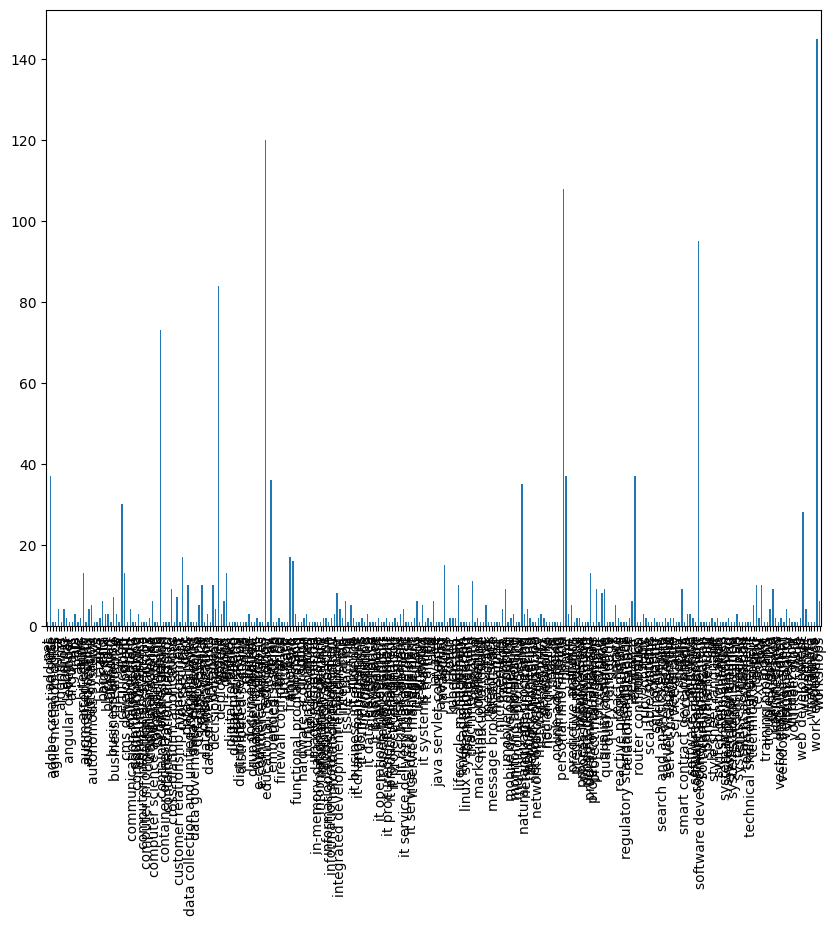

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

dataset_labels.sum(axis=0).plot.bar()

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X = []
sentences = list(dataset["Sentence"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = dataset[unique_categories_array]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(y_train.values.reshape(-1))

[0 1 0 ... 0 0 0]


In [ ]:
# Calculate class weights
class_labels = np.unique(y_train)
class_weights = compute_class_weight(class_weight="balanced", classes=class_labels, y=y_train.values.reshape(-1))
class_weight_dict = dict(zip(class_labels, class_weights))

In [ ]:
# Initialize empty lists for training and testing data
y_train_list = []
y_test_list = []

# Loop through each label
for category in unique_categories_array:
    label_name = category  # Adjust the label name based on your data
    y_train_list.append(y_train[[label_name]].values)
    y_test_list.append(y_test[[label_name]].values)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/MyDrive/ColabFiles/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

all_outputs = [Dense(1, activation='sigmoid')(LSTM_Layer1) for _ in range(len(unique_categories_array))]

model = Model(inputs=input_1, outputs=all_outputs)
print(all_outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2718')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2719')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2720')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2721')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2722')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2723')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2724')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2725')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2726')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2727')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2728')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2729')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer '

In [ ]:
print(model.summary())

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 200)]                0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 200, 100)             62900     ['input_9[0][0]']             
                                                                                                  
 lstm_8 (LSTM)               (None, 128)                  117248    ['embedding_8[0][0]']         
                                                                                                  
 dense_2718 (Dense)          (None, 1)                    129       ['lstm_8[0][0]']              
                                                                                            

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.369068 to fit



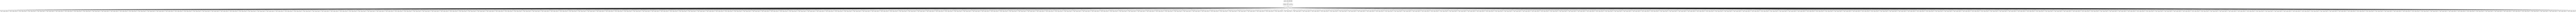

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4b.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(x=X_train, y=y_train_list, batch_size=8192, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1/1 [==============================] - 198s 198s/step - loss: 194.7744 - dense_2718_loss: 0.6931 - dense_2719_loss: 0.6931 - dense_2720_loss: 0.6931 - dense_2721_loss: 0.6931 - dense_2722_loss: 0.6931 - dense_2723_loss: 0.6931 - dense_2724_loss: 0.6931 - dense_2725_loss: 0.6931 - dense_2726_loss: 0.6931 - dense_2727_loss: 0.6931 - dense_2728_loss: 0.6931 - dense_2729_loss: 0.6931 - dense_2730_loss: 0.6931 - dense_2731_loss: 0.6931 - dense_2732_loss: 0.6931 - dense_2733_loss: 0.6931 - dense_2734_loss: 0.6931 - dense_2735_loss: 0.6931 - dense_2736_loss: 0.6931 - dense_2737_loss: 0.6931 - dense_2738_loss: 0.6931 - dense_2739_loss: 0.6931 - dense_2740_loss: 0.6931 - dense_2741_loss: 0.6931 - dense_2742_loss: 0.6931 - dense_2743_loss: 0.6931 - dense_2744_loss: 0.6931 - dense_2745_loss: 0.6931 - dense_2746_loss: 0.6931 - dense_2747_loss: 0.6931 - dense_2748_loss: 0.6931 - dense_2749_loss: 0.6931 - dense_2750_loss: 0.6931 - dense_2751_loss: 0.6931 - dense_2752_loss: 0.6931 - dense_

In [ ]:
score = model.evaluate(x=X_test, y=y_test_list, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3/3 [==============================] - 1s 285ms/step - loss: 87.8292 - dense_2718_loss: 0.1043 - dense_2719_loss: 0.4618 - dense_2720_loss: 0.1672 - dense_2721_loss: 0.3540 - dense_2722_loss: 0.2176 - dense_2723_loss: 0.6390 - dense_2724_loss: 0.5160 - dense_2725_loss: 0.0826 - dense_2726_loss: 0.2138 - dense_2727_loss: 0.1100 - dense_2728_loss: 0.7416 - dense_2729_loss: 0.2839 - dense_2730_loss: 0.5604 - dense_2731_loss: 0.1098 - dense_2732_loss: 0.2633 - dense_2733_loss: 0.0815 - dense_2734_loss: 0.1551 - dense_2735_loss: 0.2678 - dense_2736_loss: 0.5774 - dense_2737_loss: 0.5794 - dense_2738_loss: 0.5133 - dense_2739_loss: 0.6216 - dense_2740_loss: 0.1015 - dense_2741_loss: 0.2264 - dense_2742_loss: 0.1345 - dense_2743_loss: 0.3203 - dense_2744_loss: 0.3040 - dense_2745_loss: 0.2661 - dense_2746_loss: 0.1384 - dense_2747_loss: 0.1468 - dense_2748_loss: 0.4308 - dense_2749_loss: 0.0546 - dense_2750_loss: 0.1186 - dense_2751_loss: 0.1116 - dense_2752_loss: 0.2731 - dense_2753_loss: 0.

dict_keys(['loss', 'dense_2718_loss', 'dense_2719_loss', 'dense_2720_loss', 'dense_2721_loss', 'dense_2722_loss', 'dense_2723_loss', 'dense_2724_loss', 'dense_2725_loss', 'dense_2726_loss', 'dense_2727_loss', 'dense_2728_loss', 'dense_2729_loss', 'dense_2730_loss', 'dense_2731_loss', 'dense_2732_loss', 'dense_2733_loss', 'dense_2734_loss', 'dense_2735_loss', 'dense_2736_loss', 'dense_2737_loss', 'dense_2738_loss', 'dense_2739_loss', 'dense_2740_loss', 'dense_2741_loss', 'dense_2742_loss', 'dense_2743_loss', 'dense_2744_loss', 'dense_2745_loss', 'dense_2746_loss', 'dense_2747_loss', 'dense_2748_loss', 'dense_2749_loss', 'dense_2750_loss', 'dense_2751_loss', 'dense_2752_loss', 'dense_2753_loss', 'dense_2754_loss', 'dense_2755_loss', 'dense_2756_loss', 'dense_2757_loss', 'dense_2758_loss', 'dense_2759_loss', 'dense_2760_loss', 'dense_2761_loss', 'dense_2762_loss', 'dense_2763_loss', 'dense_2764_loss', 'dense_2765_loss', 'dense_2766_loss', 'dense_2767_loss', 'dense_2768_loss', 'dense_2769_

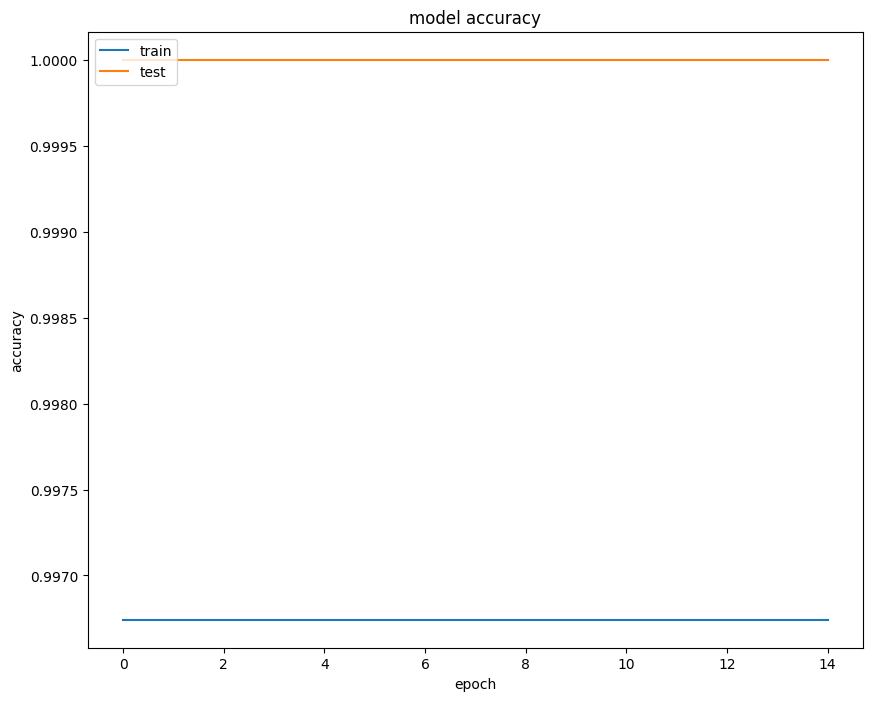

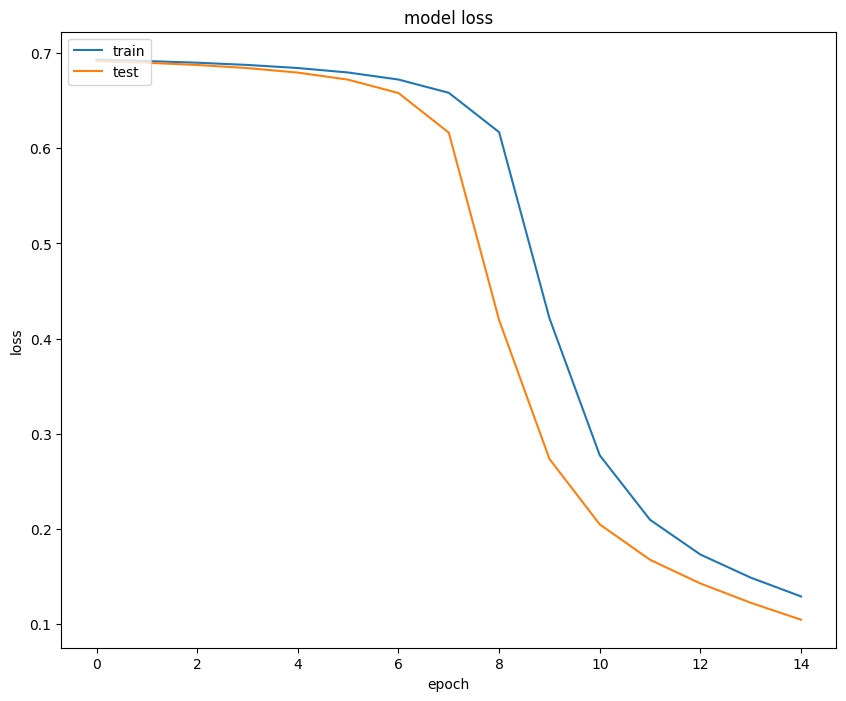

In [ ]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['dense_2718_acc'])
plt.plot(history.history['val_dense_2718_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['dense_2718_loss'])
plt.plot(history.history['val_dense_2718_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

def predict_categories(sentence):
    # Tokenize the input sentence
    tokenized_sentence = tokenizer.texts_to_sequences([sentence])

    # Pad the sequence to ensure consistent length
    padded_sequence = pad_sequences(tokenized_sentence, padding='post', maxlen=maxlen)

    # Predict categories for the input sentence
    predictions = model.predict(padded_sequence)

    # Display the results
    for i, p in enumerate(predictions):
      if p[0][0] > 0.5:
        print(unique_categories_array[i], p[0][0])
    return predictions

predictions = predict_categories("Software developer specializing in mobile app development for iOS and Android platforms.")

print(predictions)

1/1 [==============================] - 3s 3s/step
api 0.52460694
container orchestration platform 0.7021833
course 0.62066275
css 0.62543094
digital 0.55927587
e-commerce websites 0.5405298
integrated development environment 0.50272846
it procurement 0.72487324
it project coordination 0.5179698
messaging 0.6072824
predictive analytics 0.6146931
predictive modeling 0.52928716
project management 0.558248
r 0.77586806
react native 0.54283357
recruitment 0.7031012
runtime 0.7141317
sdlc oversight 0.6853663
software localization 0.55678046
spring framework 0.53589743
system implementation 0.6710833
virtual reality 0.5308715
virtualization 0.76834
[array([[0.09906773]], dtype=float32), array([[0.3176233]], dtype=float32), array([[0.15393399]], dtype=float32), array([[0.29809204]], dtype=float32), array([[0.18293153]], dtype=float32), array([[0.47215694]], dtype=float32), array([[0.39793527]], dtype=float32), array([[0.07924651]], dtype=float32), array([[0.19249943]], dtype=float32), array([[

In [ ]:
model.save('/content/drive/MyDrive/ColabFiles/TrainedModel.keras')

In [ ]:
from google.colab import files

files.download("/content/drive/MyDrive/ColabFiles/TrainedModel.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>